In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [16]:
cab_data = pd.read_csv("data_with_features.csv")

In [19]:
cab_data.head()

,Unnamed: 0,Unnamed: 0.1,dropoff_latitude,dropoff_longitude,pickup_latitude,pickup_longitude,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,start_latlng,...,tpep_pickup_datetime_is_holiday,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Precipitation,Snow,Wind Speed,Visibility
0,0,0,40.777241,-73.951744,40.776424,-73.952850,15.35,2016-04-03T00:09:40.000,2016-04-02T23:55:45.000,"40.777241, -73.951744",...,0,42,50,34,16,51,0.09,0.0,13,10
1,1,1,40.777611,-73.951080,40.789371,-73.943352,12.30,2016-04-22T09:45:11.000,2016-04-22T09:27:51.000,"40.777611, -73.951080",...,0,71,79,62,53,55,0.00,0.0,4,10
2,2,2,40.770386,-73.966476,40.761303,-73.973183,5.80,2016-04-29T20:26:47.000,2016-04-29T20:23:57.000,"40.770386, -73.966476",...,0,52,58,45,34,48,0.05,0.0,6,10
3,3,3,40.767288,-73.966675,40.764381,-73.995583,10.80,2016-04-08T11:21:10.000,2016-04-08T11:10:26.000,"40.767288, -73.966675",...,0,45,50,40,26,48,0.01,0.0,7,10
4,4,4,40.744068,-73.988991,40.754742,-73.979820,7.30,2016-04-28T09:09:32.000,2016-04-28T09:04:28.000,"40.744068, -73.988991",...,0,54,59,48,30,51,0.00,0.0,5,10


We notice that there are some trips that have prices less than 0! We remove rows with negative prices below.

In [18]:
non_zero_price = cab_data["total_amount"] > 0
cab_data = cab_data[non_zero_price]

Here's a histogram of the total_amount feature, the price of the trip (our response variable).

(array([  7.90136000e+05,   1.33736000e+05,   3.83690000e+04,
          1.77190000e+04,   1.60100000e+03,   7.48000000e+02,
          2.43000000e+02,   1.45000000e+02,   6.20000000e+01,
          5.60000000e+01,   2.80000000e+01,   2.20000000e+01,
          9.00000000e+00,   9.00000000e+00,   8.00000000e+00,
          8.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   7.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

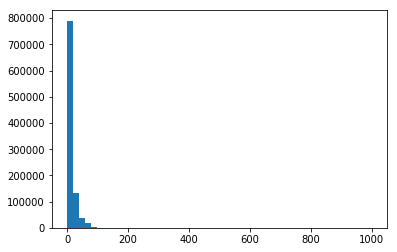

In [25]:
plt.hist(cab_data["total_amount"], bins=50)

The histogram of the price feature is quite skewed and quite non-normal.  suggesting that a linear model will be a poor fit. We use a log transform of the price feature below.

((array([-4.82353497, -4.64362929, -4.54636112, ...,  4.54636112,
          4.64362929,  4.82353497]),
  array([  1.00000000e-02,   3.00000000e-01,   3.00000000e-01, ...,
           6.77800000e+02,   7.25300000e+02,   9.98300000e+02])),
 (10.824147811952644, 15.880819636273369, 0.8056246770820028))

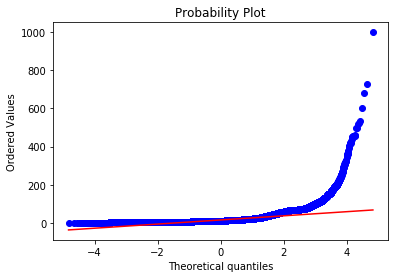

In [29]:
stats.probplot(cab_data["total_amount"], dist="norm", plot=plt)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.06000000e+02,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          1.30000000e+01,   3.66800000e+03,   1.51370000e+04,
          6.38880000e+04,   1.19399000e+05,   1.72432000e+05,
          1.65874000e+05,   1.45312000e+05,   1.04177000e+05,
          6.68720000e+04,   3.99420000e+04,   2.62050000e+04,
          2.33850000e+04,   1.82050000e+04,   1.51790000e+04,
          1.65200000e+03,   8.48000000e+02,   2.76000000e+02,
          1.24000000e+02,   6.00000000e+01,   2.40000000e+01,
          1.50000000e+01,   1.70000000e+01,   4.00000000e+00,
        

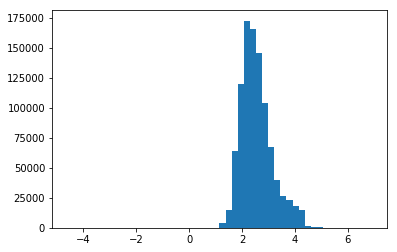

In [26]:
plt.hist(np.log(cab_data["total_amount"]), bins=50)

The plot above looks more normal, as evidenced by the qq plot below.

((array([-4.82353497, -4.64362929, -4.54636112, ...,  4.54636112,
          4.64362929,  4.82353497]),
  array([-4.60517019, -1.2039728 , -1.2039728 , ...,  6.51885226,
          6.58658536,  6.90605383])),
 (0.58099272607181662, 2.5572780969027158, 0.97716167397105091))

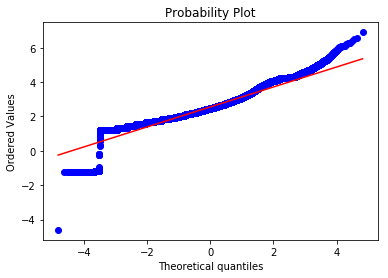

In [31]:
stats.probplot(np.log(cab_data["total_amount"]), dist="norm", plot=plt)